## **ST456 - FINAL PROJECT: OCR for information extraction for semi-structured scanned documents**

> MOTIVATION 

As an increasing number of companies across various industries focus more heavily in digital transformation, and as a result, the demand for highly accurate OCR technology is at its all-time peak. This drives the motivation of the project, which is to develop a basic data pipeline to extract key information from scanned printed documents and label the corresponding text with its entities. Enabling automation of data analysis, reducing storage costs, easing the process of dealing with administrative paperwork, improving data management, and finally adopting a more eco-friendly approach is the end goal of digitalisation. We will be focusing on OCR, one of the key technologies required to enable such transformation.

> DESCRIPTION OF OCR

Optical Character Recognition (OCR), also known as Optical Character Reader, involves taking an input of scanned printed documents and outputting the entities (e.g. address, name, price, etc.). This approach uses a combination of hardware and software to digitalise physical printed documents into machine readable text. This innovative approach takes advantage of advanced AI methods to identify different types of fonts and languages, ultimately broadening the scope of its utilisation. 

> METHODOLOGY

This will be achieved by splitting the work into three separated tasks, all working subsequently. The first task, called ‘Text Localisation’, implements a deep learning-based OCR model to scan through images, extracting coordinates where printed information appears.The second task, called ‘Text Recognition’, utilises the coordinates to crop the line-based images and recognize the text within the image. The third task, called ‘Key-Information Extract’, uses the recognized text and coordinates to label the corresponding entities with their desired categories and outputs a file grouping those specific information. Traditionally models are developed to tackle the entire challenge of OCR, which combine Text Localisation and Text Recognition, but we believe dealing with each task separately can lead to a more specific model architecture to be developed in the future.






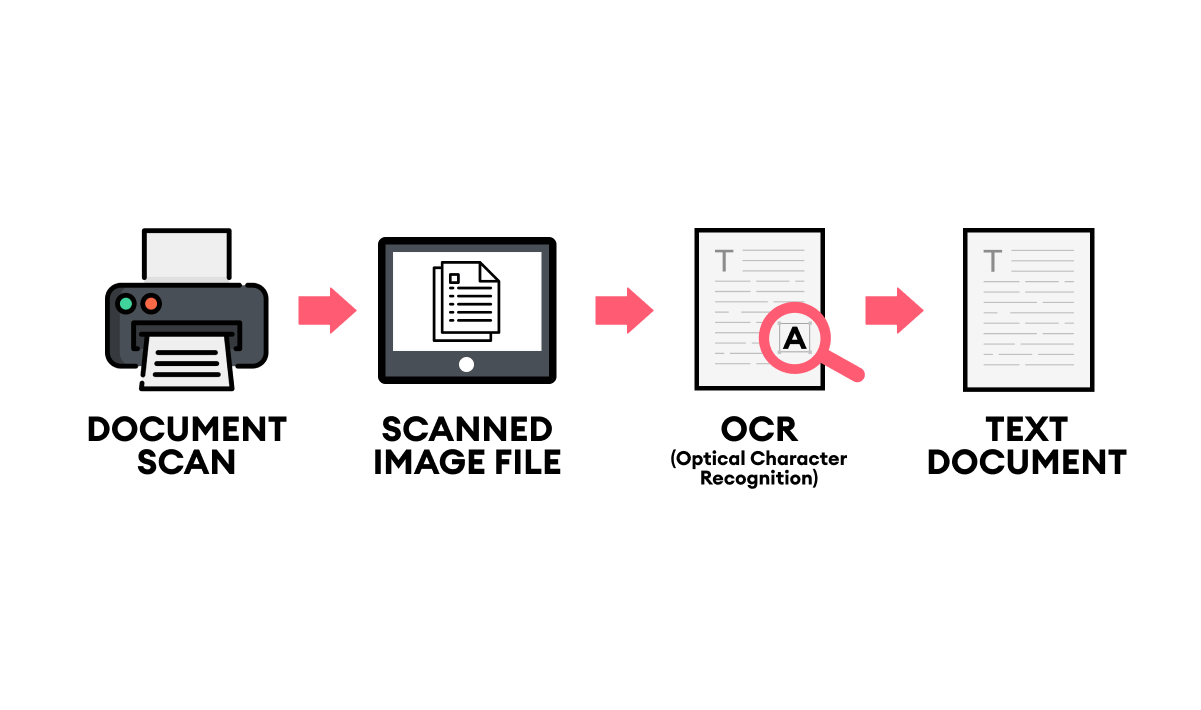

 ## **DATA DESCRIPTION**

> Our Data comes from the publicly available dataset called SROIE (scanned receipts OCR and key information extraction). The data consist of jpg images for receipts, a txt file containing the bounding boxes’ coordinates together with the text, and a json file which contains the entities labels for the company name, address, date, and total amount.
The dataset should contain 626 images, txt files, and json files, but the dataset contains some duplicates which needs to be removed, this leads to the data cleaning stage.

> The txt file contains the bounding box in the following manner: (x-y)-s of the corners of the bboxes and the corresponding text. 




## **DATA CLEANING**

### Deduplication for Task 1 & 2 (Create a new folder "DeduplicatedTask1")

In [ ]:
def identify_files_in_directory(path):
  """
  Identifing all files in the given directory

  :param path: String, the path
  :return: list, list of all objects in the given path
  """
  return sorted([f for f in listdir(path) if isfile(join(path, f))])

In [ ]:
path = "../SROIE2019/0325updated.task1train(626p)/"
jpg_txt_list = identify_files_in_directory(path)

In [ ]:
jpg_file = []
txt_file = []
for i in jpg_txt_list:
  if i[-3:] == "txt":
    txt_file.append(i)
  else:
    jpg_file.append(i)

In [ ]:
len(jpg_file),len(txt_file)

(712, 835)

Check if duplicated jpg files

In [ ]:
repeated_file = []
found_duplicate = 0
temp_files = []
for i in jpg_file:
  temp_split = i.split(".")
  file_name = temp_split[0]
  file_ext = temp_split[1]
  if len(file_name.split("("))>1:
    found_duplicate+=1
    temp_files.append(i)
  elif found_duplicate>0:
    temp_files.append(i)
    repeated_file.append(temp_files)
    found_duplicate=0
    temp_files = []

The above code groups all potentially duplicates together and create list of file groups

In [ ]:
for idx, dup_grp in enumerate(repeated_file):
  print(dup_grp)
  if idx>15:
    break

['X51005361900(1).jpg', 'X51005361900.jpg']
['X51005361907(1).jpg', 'X51005361907.jpg']
['X51005361950(1).jpg', 'X51005361950.jpg']
['X51005365179(1).jpg', 'X51005365179.jpg']
['X51005433492(1).jpg', 'X51005433492.jpg']
['X51005442376(1).jpg', 'X51005442376.jpg']
['X51005442378(1).jpg', 'X51005442378.jpg']
['X51005442379(1).jpg', 'X51005442379.jpg']
['X51005442383(1).jpg', 'X51005442383.jpg']
['X51005442384(1).jpg', 'X51005442384.jpg']
['X51005568911(1).jpg', 'X51005568911.jpg']
['X51005568913(1).jpg', 'X51005568913.jpg']
['X51005568914(1).jpg', 'X51005568914.jpg']
['X51005577192(1).jpg', 'X51005577192.jpg']
['X51005605284(1).jpg', 'X51005605284(2).jpg', 'X51005605284(3).jpg', 'X51005605284(4).jpg', 'X51005605284.jpg']
['X51005605285(1).jpg', 'X51005605285(2).jpg', 'X51005605285(3).jpg', 'X51005605285.jpg']
['X51005605286(1).jpg', 'X51005605286(2).jpg', 'X51005605286(3).jpg', 'X51005605286.jpg']


In [ ]:
import filecmp
repeated_bool = []
for file_group in repeated_file:
  repeated = False
  for i in range(len(file_group)-1):
    repeated = (not filecmp.cmp(join(path,file_group[i]),join(path,file_group[i+1]))) or repeated
  repeated_bool.append(repeated)

In [ ]:
sum(repeated_bool)

0

The above result implies that within every group of files are just files with identical content. Using the same methodology for text files.

In [ ]:
repeated_file = []
found_duplicate = 0
temp_files = []
for i in txt_file:
  temp_split = i.split(".")
  file_name = temp_split[0]
  file_ext = temp_split[1]
  if len(file_name.split("("))>1:
    found_duplicate+=1
    temp_files.append(i)
  elif found_duplicate>0:
    temp_files.append(i)
    repeated_file.append(temp_files)
    found_duplicate=0
    temp_files = []

In [ ]:
repeated_bool = []
for file_group in repeated_file:
  repeated = False
  for i in range(len(file_group)-1):
    repeated = (not filecmp.cmp(join(path,file_group[i]),join(path,file_group[i+1]))) or repeated
  repeated_bool.append(repeated)

In [ ]:
sum(repeated_bool)

0

For txt files, different versions are just exact duplicates as well. 

Deduplication

In [ ]:
dedup_jpg = []
dedup_txt = []
# Same process repeated for both txt and jpg files
for jpg in jpg_file:
  temp = jpg.split(".")
  file_ext = temp[1]
  file_name=temp[0]
  file_name = file_name.split("(")[0]
  dedup_jpg.append(file_name+"."+file_ext) # Only append the files with the same root (e.g. x123 (1).jpg and x123.jpg has the same root x123)

for txt in txt_file:
  temp = txt.split(".")
  file_ext = temp[1]
  file_name=temp[0]
  file_name = file_name.split("(")[0]
  dedup_txt.append(file_name+"."+file_ext)

dedup_jpg = sorted(list(set(dedup_jpg)))
dedup_txt = sorted(list(set(dedup_txt)))

In [ ]:
len(dedup_jpg),len(dedup_txt)

(626, 626)

In [ ]:
for i in range(10):
  print(dedup_jpg[i],dedup_txt[i])

X00016469612.jpg X00016469612.txt
X00016469619.jpg X00016469619.txt
X00016469620.jpg X00016469620.txt
X00016469622.jpg X00016469622.txt
X00016469623.jpg X00016469623.txt
X00016469669.jpg X00016469669.txt
X00016469672.jpg X00016469672.txt
X00016469676.jpg X00016469676.txt
X51005200938.jpg X51005200938.txt
X51005230617.jpg X51005230617.txt


The top 10 jpg and txt files looks like they matches. Check if **all** file name in jpg and txt matches.

In [ ]:
same = True
for i in range(min(len(dedup_jpg),len(dedup_txt))):
  same = same and (dedup_jpg[i].split(".")[0]==dedup_txt[i].split(".")[0]) # if at least one false, then same will be False
print(f"Is same? {same}")

Is same? True


Check if all files exist (i.e. no alien files has been introduced in the process)

In [ ]:
exist = True
for i in range(len(dedup_jpg)):
  exist = exist and (dedup_jpg[i] in jpg_txt_list) and (dedup_txt[i] in jpg_txt_list) # if at least one false, then exist will be False
print(f"All exist? {exist}")

All exist? True


Create a new folder called "DeduplicatedTask1" to store all the files without its duplicates.

In [ ]:
# if not os.path.exists("../SROIE2019/DeduplicatedTask1/"):
#   print("Data Directory not exist")
#   os.makedirs("../SROIE2019/DeduplicatedTask1/")

# for i in range(len(dedup_jpg)):
#   jpg_to_move = dedup_jpg[i]
#   txt_to_move = dedup_txt[i]
#   shutil.copyfile(path+jpg_to_move, "../SROIE2019/DeduplicatedTask1/"+jpg_to_move)
#   shutil.copyfile(path+txt_to_move, "../SROIE2019/DeduplicatedTask1/"+txt_to_move)

### Deduplication for Task 3 (Create a new folder "DeduplicatedTask3")

In [ ]:
path_2 = "../SROIE2019/0325updated.task2train(626p)/"
jpg_txt_list_2 = identify_files_in_directory(path_2)

In [ ]:
jpg_txt_list_2[:10]

['X00016469612.jpg',
 'X00016469612.txt',
 'X00016469619.jpg',
 'X00016469619.txt',
 'X00016469620.jpg',
 'X00016469620.txt',
 'X00016469622.jpg',
 'X00016469622.txt',
 'X00016469623.jpg',
 'X00016469623.txt']

In [ ]:
jpg_file_2 = []
txt_file_2 = []
for i in jpg_txt_list_2:
  if i[-3:] == "txt":
    txt_file_2.append(i)
  else:
    jpg_file_2.append(i)

In [ ]:
len(jpg_file_2),len(txt_file_2)

(735, 876)

Check if duplicated jpg files

In [ ]:
repeated_file = []
found_duplicate = 0
temp_files = []
for i in jpg_file_2:
  temp_split = i.split(".")
  file_name = temp_split[0]
  file_ext = temp_split[1]
  if len(file_name.split("("))>1:
    found_duplicate+=1
    temp_files.append(i)
  elif found_duplicate>0:
    temp_files.append(i)
    repeated_file.append(temp_files)
    found_duplicate=0
    temp_files = []

The above code groups all potentially duplicates together and create list of file groups

In [ ]:
for idx, dup_grp in enumerate(repeated_file):
  print(dup_grp)
  if idx>5:
    break

['X51005301659(1).jpg', 'X51005301659(2).jpg', 'X51005301659(3).jpg', 'X51005301659(4).jpg', 'X51005301659.jpg']
['X51005301661(1).jpg', 'X51005301661(2).jpg', 'X51005301661.jpg']
['X51005301667(1).jpg', 'X51005301667(2).jpg', 'X51005301667.jpg']
['X51005303661(1).jpg', 'X51005303661(2).jpg', 'X51005303661(3).jpg', 'X51005303661(4).jpg', 'X51005303661.jpg']
['X51005306399(1).jpg', 'X51005306399(2).jpg', 'X51005306399(3).jpg', 'X51005306399(4).jpg', 'X51005306399.jpg']
['X51005337872(1).jpg', 'X51005337872.jpg']
['X51005361883(1).jpg', 'X51005361883.jpg']


In [ ]:
import filecmp
repeated_bool = []
for file_group in repeated_file:
  repeated = False
  for i in range(len(file_group)-1):
    repeated = (not filecmp.cmp(join(path_2,file_group[i]),join(path_2,file_group[i+1]))) or repeated
  repeated_bool.append(repeated)

In [ ]:
sum(repeated_bool)

0

The above result implies that within every group of files are just files with identical content. Using the same methodology for text files.

In [ ]:
repeated_file = []
found_duplicate = 0
temp_files = []
for i in txt_file_2:
  temp_split = i.split(".")
  file_name = temp_split[0]
  file_ext = temp_split[1]
  if len(file_name.split("("))>1:
    found_duplicate+=1
    temp_files.append(i)
  elif found_duplicate>0:
    temp_files.append(i)
    repeated_file.append(temp_files)
    found_duplicate=0
    temp_files = []

In [ ]:
repeated_bool = []
for file_group in repeated_file:
  repeated = False
  for i in range(len(file_group)-1):
    repeated = (not filecmp.cmp(join(path_2,file_group[i]),join(path_2,file_group[i+1]))) or repeated
  repeated_bool.append(repeated)

In [ ]:
sum(repeated_bool)

0

For txt files, different versions are just exact duplicates as well. 

Deduplication

In [ ]:
dedup_jpg_2 = []
dedup_txt_2 = []
# Same process repeated for both txt and jpg files
for jpg in jpg_file_2:
  temp = jpg.split(".")
  file_ext = temp[1]
  file_name=temp[0]
  file_name = file_name.split("(")[0]
  dedup_jpg_2.append(file_name+"."+file_ext) # Only append the files with the same root (e.g. x123 (1).jpg and x123.jpg has the same root x123)

for txt in txt_file_2:
  temp = txt.split(".")
  file_ext = temp[1]
  file_name=temp[0]
  file_name = file_name.split("(")[0]
  dedup_txt_2.append(file_name+"."+file_ext)

dedup_jpg_2 = sorted(list(set(dedup_jpg)))
dedup_txt_2 = sorted(list(set(dedup_txt)))

In [ ]:
len(dedup_jpg_2),len(dedup_txt_2)

(626, 626)

In [ ]:
for i in range(10):
  print(dedup_jpg_2[i],dedup_txt_2[i])

X00016469612.jpg X00016469612.txt
X00016469619.jpg X00016469619.txt
X00016469620.jpg X00016469620.txt
X00016469622.jpg X00016469622.txt
X00016469623.jpg X00016469623.txt
X00016469669.jpg X00016469669.txt
X00016469672.jpg X00016469672.txt
X00016469676.jpg X00016469676.txt
X51005200938.jpg X51005200938.txt
X51005230617.jpg X51005230617.txt


The top 10 jpg and txt files looks like they matches. Check if **all** file name in jpg and txt matches.

In [ ]:
same = True
for i in range(min(len(dedup_jpg_2),len(dedup_txt_2))):
  same = same and (dedup_jpg_2[i].split(".")[0]==dedup_txt_2[i].split(".")[0]) # if at least one false, then same will be False
print(f"Is same? {same}")

Is same? True


Check if all files exist (i.e. no alien files has been introduced in the process)

In [ ]:
exist = True
for i in range(len(dedup_jpg_2)):
  exist = exist and (dedup_jpg_2[i] in jpg_txt_list_2) and (dedup_txt_2[i] in jpg_txt_list_2) # if at least one false, then exist will be False
print(f"All exist? {exist}")

All exist? True


Checking whether the two txt files (BBox+text and JSON) are matching

In [ ]:
same = True
for i in range(min(len(dedup_txt),len(dedup_txt_2))):
  same = same and (dedup_txt[i].split(".")[0]==dedup_txt_2[i].split(".")[0]) # if at least one false, then same will be False
print(f"Is same? {same}")

Is same? True


In [ ]:
# if not os.path.exists("../SROIE2019/DeduplicatedTask3/"):
#   print("Data Directory not exist")
#   os.makedirs("../SROIE2019/DeduplicatedTask3/")

# for i in range(len(dedup_txt)):
#   json_to_move = dedup_txt_2[i]
#   filename = json_to_move.split(".")[0]
#   txt_to_move = dedup_txt[i]
#   jpg_to_move = dedup_jpg_2[i]
#   shutil.copyfile(path_2+json_to_move, "../SROIE2019/DeduplicatedTask3/"+filename+"JSON.txt")
#   shutil.copyfile(path+txt_to_move, "../SROIE2019/DeduplicatedTask3/"+txt_to_move)
#   shutil.copyfile(path_2+jpg_to_move, "../SROIE2019/DeduplicatedTask3/"+jpg_to_move)

## **TASK 1 - TEXT LOCALISATION**

> Localizing and recognizing text from scene images captured by a camera is a conventional step to data extraction. This task is proposing the implementation of a Tesseract optical recognition character engine to create boxes around the identified text from printed invoices. Its version 4.00 includes a new neural network subsystem configured as a text line recognizer, originating from LSTM neural network. This one was pre-trained on different types of datasets to recognise different types of fonts and languages. A Convolutional Neural Network is performed to recognise an image that contains any type of character. Following this one, RNNs, and more specifically under the form of LSTM, plays the role of detecting text sequence of characters. Therefore, this particular version of tesseract responds to the goal of our first task, that is detecting text at a word-level. 

> Using pytesseract, the model was utilised to execute the task at hand. All jpg images are being pre-processed and converted into a RGB mode as well as resized to improve data quality, essential to improve the model's accuracy. The following step consists in creating bouding boxes around texts detected from tesseract. Also known as bbox, these were solely visualised on a single file as display them for all images would slow the process grantly. Finally, getting the data out of those boxes provided with the resultant outcome, and provide task 2 with the necessary outcome to proceed: the coordinates of the texts within the images. Testing this model consisted in creating a matching analysis comparing both txt files and the resultant bounding boxes achieved from running tesseract on jpg files. 



In [ ]:
#enable access to google drive files
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/ST456-Final-Project')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install gitpython
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install Pillow==9.0.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
import cv2
import glob
import os.path as osp
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import tensorflow as tf
import glob
from PIL import Image
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pytesseract
from pytesseract import Output
from pathlib import Path
import os
import glob
import json 
import random
from pathlib import Path
from difflib import SequenceMatcher
import shutil
from PIL import Image, ImageDraw, ImageFont
import cv2
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from IPython.display import display
import matplotlib
from matplotlib import pyplot, patches


**DATA EXTRACTION**

In [ ]:
def identify_files_in_directory(path):
  """
  Identifing all files in the given directory

  :param path: String, the path
  :return: list, list of all objects in the given path
  """
  return sorted([f for f in listdir(path) if isfile(join(path, f))])

In [ ]:
## Function to plot multiple images
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

In [ ]:
#make a list of only jpeg files from folder 
import numpy as np
import csv

path = "/content/drive/MyDrive/ST456-Final-Project/SROIE2019/DeduplicatedTask1"
jpg_txt_list = identify_files_in_directory(path)

jpg_file = []
txt_file = []
for i in jpg_txt_list:
  if i[-3:] == "txt":
    txt_file.append(i)
  else:
    jpg_file.append(i)

In [ ]:
pytesseract. get_tesseract_version() 

<Version('4.0.0')>

**SINGLE** **FILE** **PRE-PROCESSING**

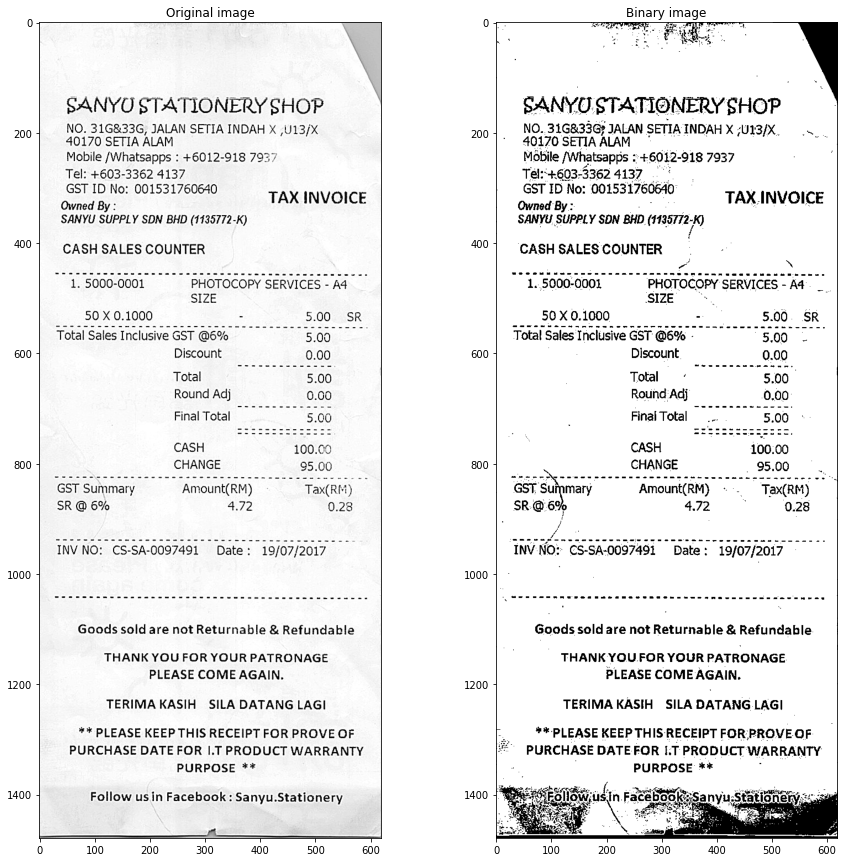

In [ ]:
img_path = '/content/drive/MyDrive/ST456-Final-Project/SROIE2019/DeduplicatedTask1/X00016469619.jpg'
img = cv2.imread(img_path, 0) 
# Simple thresholding
ret, img_binary = cv2.threshold(img,230,255,cv2.THRESH_BINARY) #THRESH_BINARY
# Plot the images
images = [img, img_binary]
titles = ['Original image', 'Binary image']
plot_img(images, titles)

In [ ]:
#data extraction for a single file using pytesseract
import cv2 
import pytesseract
import sys

if len(sys.argv) < 2:
  print('Usage: python ocr_simple.py image.jpg')
  sys.exit(1)

img_path = '/content/drive/MyDrive/ST456-Final-Project/SROIE2019/DeduplicatedTask1/X00016469619.jpg'
img = cv2.imread(img_path,0) 
# Adding custom options
config_cust = ('-l eng --oem 1 --psm 3')
#pytesseract.image_to_data(img, config=custom_config)
text=pytesseract.image_to_data(img_binary, config=config_cust,lang="eng", output_type=Output.DICT)
print(text.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


**TEXT EXTRACTION FROM BOXES**

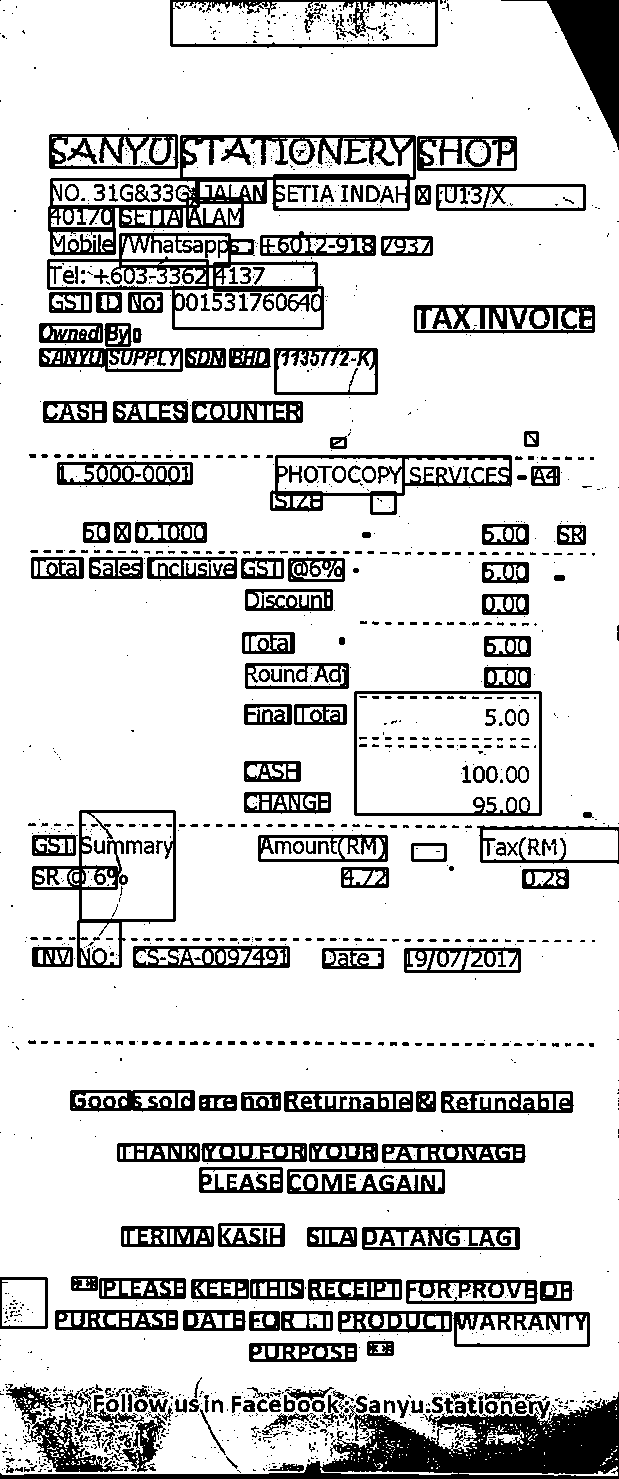

In [ ]:
#visualisation of boxes
n_boxes = len(text['line_num'])
#n_boxes = len(text['level'])
coordinates=[]
boxes=[]
for i in range(n_boxes):
  (x, y, w, h) = (text['left'][i], text['top'][i], text['width'][i], text['height'][i])
  words=text['text'][i]
  if not (words == '') or words.isspace():
    img = cv2.rectangle(img_binary, (x, y), (x + w, y + h), (0, 0, 255), 2) #thresholded image with RGB values
    boxes.append((x,y,w,h))
    coordinates.append((x,y,w,h,words))
cv2_imshow(img)

**MULTIPLE** **FILES** **EXTRACTION**

In [ ]:
th_list=[]
fin_img=[]
#threshold = 200

for im in sorted(jpg_file[0:3]):
  new_path =  path + '/' + im
  #print(new_path)
  img_th = cv2.imread(new_path, 0) 
  #arr_img
  ret, img_bb = cv2.threshold(img_th,230,255,cv2.THRESH_BINARY) #THRESH_BINARY
  #append img_bb np arrays 
  fin_img.append(img_bb)
  #rgb_img = (Image.open(new_path).convert("RGB")).resize((300, 600))
  th_img = (Image.open(new_path)).resize((300, 600))
  #convert into tif file 
  imm = im.replace('.jpg', '.tif')
  #save into data_temp folder temporarily 
  th_img.save("/content/drive/MyDrive/ST456-Final-Project/tesstrain/data_temp/"+ imm, 'TIFF')
  #append to a list of images 
  th_list.append(th_img)

In [ ]:
#get the text for each image
config_cust = ('-l eng --oem 1 --psm 3')
list_text=[]
list_boxes=[]
for every_img in th_list: #or jpg_file??
  #adding custom options
  text=pytesseract.image_to_data(every_img, config=config_cust,lang="eng", output_type=Output.DICT)
  list_text.append(text) #create a list with dicts of every text being extracted of each img SO type(): list[dicts{},{},{}]
  #for n in list_text:
    #numb_boxes = len(n['line_num'])
  list_boxes.append(text['line_num']) #get a list of ints == number of lines each text has 

In [ ]:
words_box=[]
boxes_coord=[]
text_coord=[]
for txt in list_text:
  temp=[]
  box_temp=[]
  for i in range(0, len(txt['line_num'])):
    (x, y, w, h) = (txt['left'][i], txt['top'][i], txt['width'][i], txt['height'][i])
    words=txt['text'][i]
    if not (words=='' or words.isspace()):
      temp.append((x,y,w,h,words))
      box_temp.append((x,y,w,h))
  text_coord.append(temp)
  boxes_coord.append(box_temp)

**TASK 1 EVALUATION - INTERSECTION OF UNION**

In [ ]:
#A function that opens and reads all the text files in the path provided and then stores them as a dataframe in a list
def read_bbox_and_words(path: Path):
  bbox_and_words_list = []

  with open(path, 'r', errors='ignore') as f:
    for line in f.read().splitlines():
      if len(line) == 0:
        continue
        
      split_lines = line.split(",")

      bbox = np.array(split_lines[0:8], dtype=np.int32)
      width = bbox[2]-bbox[0]
      height = bbox[5]-bbox[1]
      new_bb = (bbox[0], bbox[1], width, height)
      text = ",".join(split_lines[8:])

      # From the splited line we save (filename, [bounding box points], text line).
      # The filename will be useful in the future
      bbox_and_words_list.append([path.stem, *new_bb, text])

  #Stores the file in a dataframe with columns: 'filename', 'x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'line'  
  dataframe = pd.DataFrame(bbox_and_words_list, columns=['filename', 'left', 'top', 'width', 'height', 'line'])
  #dataframe = dataframe.drop(columns=['x1', 'y1', 'x3', 'y3'])

  return dataframe

In [ ]:
#access first for elements of the txt file 
path_txt = []
for subdir, dirs, files in os.walk(Path(path)):
  for file in files:
    if file.endswith(".txt"):
      t=(file)
      path_txt.append(t)
#bbox_txt = read_bbox_and_words()

In [ ]:
path_all_txt = []
for i in sorted(path_txt):
  t = (Path(path)/i)
  path_all_txt.append(t)

In [ ]:
list_coortxt =[]
for k in path_all_txt:
  bbox_txt = read_bbox_and_words(k)
  list_coortxt.append(bbox_txt)

In [ ]:
def bb_intersection_over_union(boxA, boxB):
  x0, y0, width, height = boxA
  left, top, w, h = boxB
  bottom = y0-height
  right = x0+width
  b = top-h
  r = left+w
  #boxA = (x0,y0,bottom,right)
  #boxB = (left,top,b,r)
	# determine the (x, y)-coordinates of the intersection rectangle
  xA = max(x0, left)
  yA = max(y0, top)
  xB = min(bottom, b)
  yB = min(right, r)
	# compute the area of intersection rectangle
  interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
  boxAArea = width * height
  boxBArea = w * h
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
  iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
  return iou

In [ ]:
final_matched = []
for id, files in enumerate(text_coord):
  matched_box = []
  for ix, line in enumerate(files):

    #print(type(line[4]))
    text_fing = line[4]
    box_a=line[:4]
    #print(type(box_a))
    list_search = list_coortxt[id]['line']
    #coords_search = list_coortxt[id]['line']["left","top","width","height"]
    #list_coortxt[id][[line[4] in lines for lines in list_coortxt[id]['line']]]["left","top","width","height"]
    #print(type(line[4]))
    #print(type(list_coortxt[id]['line']))
    res = [text_fing.lower() in [i.lower() for i in words.split()] for words in list_search]
    #print(list_coortxt[id]line[4])
    #if any(line[4] in word for word in list_coortxt[id]['line']):
    matched_line = list_coortxt[id][res][["left","top","width","height"]]
    #print(type(matched_line))
    if not matched_line.empty:
      iou=[]
      for i in range(matched_line.shape[0]):
        #print(i)
        iou_temp = bb_intersection_over_union(box_a,matched_line.iloc[i,:])
        print(iou_temp)
        iou.append(iou_temp)
      max_val = max(iou)

      matched_box.append(max_val)
  
  final_matched.append(np.array(matched_box))

**PRE-PROCESSING FOR TRAINING**

In [ ]:
#add files to the intended folder for training
path3 = '/content/drive/MyDrive/ST456-Final-Project/tesstrain/data_temp'
path4= '/content/drive/MyDrive/ST456-Final-Project/tesstrain/data/MODEL_NAME-ground-truth'

texts_f = [f for f in os.listdir(path3)]

for file in texts_f:
  file_path = os.path.join(path3,file)
  

  if file_path.endswith('.tif')==True:
    shutil.copy(file_path, path4)

In [ ]:
def read_bbox_and_words(paths, rootdir):
  bbox_and_words_list = []
  for path in paths:
    with open(rootdir+path, 'r', errors='ignore') as f:
      for line in f.read().splitlines():
        if len(line) == 0:
          continue
          
        split_lines = line.split(",")

        bbox = np.array(split_lines[0:8],dtype=np.int32)
        text = ",".join(split_lines[8:])

        # From the splited line we save (filename, [bounding box points], text line).
        # The filename will be useful in the future
        bbox_and_words_list.append([path[:-4], *bbox, text])
      
  dataframe = pd.DataFrame(bbox_and_words_list, columns=['filename', 'x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'line'])
  dataframe = dataframe.drop(columns=['x1', 'y1', 'x3', 'y3'])

  return dataframe

In [ ]:
#create .gt.txt
df = read_bbox_and_words(paths = txt_file,rootdir = "./SROIE2019/DeduplicatedTask1/")
max_len = -1000
for line in df["line"]:
  if len(line)>max_len:
    max_len = len(line)
print(f"max_length: {max_len}")
df

max_length: 68


filename   x0   y0   x2   y2                                 line
0      X00016469612   72   25  326   64                        TAN WOON YANN
1      X00016469612   50   82  440  121       BOOK TA .K(TAMAN DAYA) SDN BND
2      X00016469612  205  121  285  139                             789417-W
3      X00016469612  110  144  383  163     NO.53 55,57 & 59, JALAN SAGU 18,
4      X00016469612  192  169  299  187                          TAMAN DAYA,
...             ...  ...  ...  ...  ...                                  ...
33621  X51009453804  124  772  170  790                                TOTAL
33622  X51009453804  318  773  366  790                                11.32
33623  X51009453804  439  772  478  789                                 0.68
33624  X51009453804  242  810  362  828                            THANK YOU
33625  X51009453804  159  837  461  853  FOR ANY ENQUIRY, PLEASE CONTACT US:

[33626 rows x 6 columns]

In [ ]:
df['line'] = df['line'].astype(str) + str('/t')
df['line']

0                              TAN WOON YANN/t
1             BOOK TA .K(TAMAN DAYA) SDN BND/t
2                                   789417-W/t
3           NO.53 55,57 & 59, JALAN SAGU 18,/t
4                                TAMAN DAYA,/t
                         ...                  
33621                                  TOTAL/t
33622                                  11.32/t
33623                                   0.68/t
33624                              THANK YOU/t
33625    FOR ANY ENQUIRY, PLEASE CONTACT US:/t
Name: line, Length: 33626, dtype: object

In [ ]:
one_line_df = df[["filename","line"]].groupby(["filename"])["line"].transform(lambda x: ' '.join(x).strip())
one_line_df
#print(one_line_df.shape[0])

0        TAN WOON YANN/t BOOK TA .K(TAMAN DAYA) SDN BND...
1        TAN WOON YANN/t BOOK TA .K(TAMAN DAYA) SDN BND...
2        TAN WOON YANN/t BOOK TA .K(TAMAN DAYA) SDN BND...
3        TAN WOON YANN/t BOOK TA .K(TAMAN DAYA) SDN BND...
4        TAN WOON YANN/t BOOK TA .K(TAMAN DAYA) SDN BND...
                               ...                        
33621    3180303/t LIAN HING STATIONERY SDN BHD/t (1627...
33622    3180303/t LIAN HING STATIONERY SDN BHD/t (1627...
33623    3180303/t LIAN HING STATIONERY SDN BHD/t (1627...
33624    3180303/t LIAN HING STATIONERY SDN BHD/t (1627...
33625    3180303/t LIAN HING STATIONERY SDN BHD/t (1627...
Name: line, Length: 33626, dtype: object

In [ ]:
one_line_df = one_line_df.to_frame().merge(df, left_index=True, right_index=True)[["line_x","filename"]]
one_line_df = one_line_df.drop_duplicates()
for i in range(one_line_df.shape[0]):
  row = one_line_df.iloc[i,:]
  text = row[0]
  filename = row[1]

  text_file = open("/content/drive/MyDrive/ST456-Final-Project/tesstrain/data_temp/"+f"{filename}.gt.txt", "w")
  
  #write string to file
  text_file.write(text)
  
  #close file
  text_file.close()

In [ ]:
#move .gt.txt to intended folder
folder1 = '/content/drive/MyDrive/ST456-Final-Project/tesstrain/data_temp'
folder2= '/content/drive/MyDrive/ST456-Final-Project/tesstrain/data/MODEL_NAME-ground-truth'

texts_f = [f for f in os.listdir(folder1)]

for file in texts_f:
  file_path = os.path.join(folder1,file)

  if file_path.endswith('.gt.txt')==True:
    shutil.copy(file_path, folder2)

**TRAINING** **TESSERACT** **MODEL**

In [ ]:
os.chdir('/content/drive/MyDrive/ST456-Final-Project')

In [ ]:
#get in the github repository
os.getcwd()

'/content/drive/MyDrive/ST456-Final-Project'

In [ ]:
cd tesstrain/

/content/drive/MyDrive/ST456-Final-Project/tesstrain


In [ ]:
!ls

data			       generate_wordstr_box.py	plot
data_temp		       LICENSE			README.md
generate_gt_from_box.py        Makefile			requirements.txt
generate_line_box.py	       normalize.py		shuffle.py
generate_line_syllable_box.py  ocrd-testset.zip		src


In [ ]:
#create data folder
!make training MODEL_NAME=MODEL_NAME 

find -L data/MODEL_NAME-ground-truth -name '*.gt.txt' | xargs paste -s > "data/MODEL_NAME/all-gt"
unicharset_extractor --output_unicharset "data/MODEL_NAME/unicharset" --norm_mode 2 "data/MODEL_NAME/all-gt"
Bad box coordinates in boxfile string! TAN WOON YANN/t BOOK TA .K(TAMAN DAYA) SDN BND/t 789417-W/t NO.53 55,57 & 59, JALAN SAGU 18,/t TAMAN DAYA,/t 81100 JOHOR BAHRU,/t JOHOR./t DOCUMENT NO : TD01167104/t DATE:/t 25/12/2018 8:13:39 PM/t CASHIER:/t MANIS/t MEMBER:/t CASH BILL/t CODE/DESC/t PRICE/t DISC/t AMOUNT/t QTY/t RM/t RM/t 9556939040116/t KF MODELLING CLAY KIDDY FISH/t 1 PC/t */t 9.000/t 0.00/t 9.00/t TOTAL:/t ROUR DING ADJUSTMENT:/t 0.00/t ROUND D TOTAL (RM):/t 9.00/t CASH/t 10.00/t CHANGE/t 1.00/t GOODS SOLD ARE NOT RETURNABLE OR/t EXCHANGEABLE/t ***/t ***/t THANK YOU/t PLEASE COME AGAIN !/t 9.00/t
Extracting unicharset from plain text file data/MODEL_NAME/all-gt
Other case a of A is not in unicharset
Other case n of N is not in unicharset
Other case w of W is not in unichars

In [ ]:
list = os.listdir('/content/drive/MyDrive/ST456-Final-Project/tesstrain/MODEL_NAME-ground-truth') # dir is your directory path
number_files = len(list)
print(number_files)


1252


In [ ]:
folder2= '/content/drive/MyDrive/ST456-Final-Project/tesstrain/data_temp/'

texts_f = [f for f in os.listdir(folder2)]

for file in texts_f:
  #print(file)
  file_path = os.path.join(folder2,file)
  #print(file_path)
  if file_path.endswith('.tif')==True: 
    continue
  else: 
    os.remove(os.path.join(folder2, file))

In [ ]:
!pip install -r requirements.txt

In [ ]:
!apt-get install bc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  bc
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 86.2 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 bc amd64 1.07.1-2 [86.2 kB]
Fetched 86.2 kB in 0s (1,639 kB/s)
Selecting previously unselected package bc.
(Reading database ... 155561 files and directories currently installed.)
Preparing to unpack .../archives/bc_1.07.1-2_amd64.deb ...
Unpacking bc (1.07.1-2) ...
Setting up bc (1.07.1-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!make training MODEL_NAME=MODEL_NAME 

In [ ]:
!make clean MODEL_NAME=MODEL_NAME

find -L data/MODEL_NAME-ground-truth -name '*.box' -delete
find -L data/MODEL_NAME-ground-truth -name '*.lstmf' -delete
rm -rf data/MODEL_NAME


We realize Task 1 would be difficult to do on its own, as a lot of pretrained model will combine Task 1 and 2, namely Text Localisation and Text Recognition. Due to the difficulty of the task, we decide to combine the objective of Task 1 and Task 2 together.

## **Task 2 - TEXT RECOGNITION**

> Since we are combinging Task 1 and Task 2, the main input of this model is the bounding boxes which gives the relative position of the line text.

> Traditional approach uses a CNN backbone with a LSTM model to recognize the image patterns to predict the texts. In this section the base model TrOCR is implemented and fine-tuned to our dataset SROIE.

> This model uses a transformer architecture, having a encoder-decoder structure which the encoder's weights are initialized with VeiT type models, and the decoder's weights are initialized with BERT type models. More specifically, the model chosen to be initialized in our implementations are BEiTBASE for the encoder and RoBERTaBASE for the decoder. Ref: [TrOCR Paper](https://arxiv.org/pdf/2109.10282v3.pdf)




In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install sentencepiece
!pip install -q datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


Ref: https://github.com/NielsRogge/Transformers-Tutorials/blob/master/TrOCR/Fine_tune_TrOCR_on_IAM_Handwriting_Database_using_Seq2SeqTrainer.ipynb

### **Loading Data**

Given the clean folder, we would like to collect all the jpg files' and txt files' paths. The following function is defined to detect all files given a folder path.

In [ ]:
def identify_files_in_directory(path):
  """
  Identifing all files in the given directory

  :param path: String, the path
  :return: list, list of all objects in the given path
  """
  return sorted([f for f in listdir(path) if isfile(join(path, f))])

Using the function, we first gather all the file_names.extention, then we collect the jpg paths into a list, then txt paths into another.

In [ ]:
path = "../SROIE2019/DeduplicatedTask1/"
jpg_txt_list = identify_files_in_directory(path)

jpg_file = []
txt_file = []
for i in jpg_txt_list:
  if i[-3:] == "txt":
    txt_file.append(i)
  else:
    jpg_file.append(i)

The following functions takes in the txt_file paths list, gather the bounding boxes coordinates, the text, and creates a dataframe.

In [ ]:
def read_bbox_and_words(paths, rootdir):
  bbox_and_words_list = []
  for path in paths:
    with open(rootdir+path, 'r', errors='ignore') as f:
      for line in f.read().splitlines():
        if len(line) == 0:
          continue
          
        split_lines = line.split(",")

        bbox = np.array(split_lines[0:8],dtype=np.int32)
        text = ",".join(split_lines[8:])

        # From the splited line we save (filename, [bounding box points], text line).
        # The filename will be useful in the future
        bbox_and_words_list.append([path[:-4], *bbox, text])
      
  dataframe = pd.DataFrame(bbox_and_words_list, columns=['filename', 'x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'line'])
  dataframe = dataframe.drop(columns=['x1', 'y1', 'x3', 'y3'])

  return dataframe

In [ ]:
df = read_bbox_and_words(paths = txt_file,rootdir = "../SROIE2019/DeduplicatedTask1/")

In [ ]:
df

filename   x0   y0   x2   y2                                 line
0      X00016469612   72   25  326   64                        TAN WOON YANN
1      X00016469612   50   82  440  121       BOOK TA .K(TAMAN DAYA) SDN BND
2      X00016469612  205  121  285  139                             789417-W
3      X00016469612  110  144  383  163     NO.53 55,57 & 59, JALAN SAGU 18,
4      X00016469612  192  169  299  187                          TAMAN DAYA,
...             ...  ...  ...  ...  ...                                  ...
33621  X51009453804  124  772  170  790                                TOTAL
33622  X51009453804  318  773  366  790                                11.32
33623  X51009453804  439  772  478  789                                 0.68
33624  X51009453804  242  810  362  828                            THANK YOU
33625  X51009453804  159  837  461  853  FOR ANY ENQUIRY, PLEASE CONTACT US:

[33626 rows x 6 columns]

The max length across all the texts will be used as the hyperparameter for padding length for the model.

In [ ]:
max_len = -1000
for line in df["line"]:
  if len(line)>max_len:
    max_len = len(line)
print(f"max_length: {max_len}")

max_length: 68


### **Data Preprocessing**

We are splitting training, evaluation, and testing dataset to train the model, validate the model, and compute the final testing accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
# df = df.iloc[:,:]
train_df, test_df = train_test_split(df, test_size=0.4)
# we reset the indices to start from zero
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

train_df, eval_df = train_test_split(train_df, test_size=0.4)
train_df.reset_index(drop=True,inplace=True)
eval_df.reset_index(drop=True,inplace=True)

Here we define a class to process the dataframe. The attributes of this class includes the root directory (The data file location), df (the dataframe to process), processor (the pretrained processor which will be used to preprocess the text), and the max_target_length (default 128)

For each row in the input dataframe, it will assume the dataframe to have a filename, the four bounding box's coordinates, and the text associated to the box. It will then converted ithe image nto RGB image, crop the corresponding RGB image to text box images. For the text, it will use the processor to tokenize the text using BPE, and replacing the padding token with -100. Finally, when acessing the rows, it will return the pixel values of the cropped RGB image, as well as the tokens corresponding to the text.

In [ ]:
import torch
from torch.utils.data import Dataset
from PIL import Image

class SROIEDataset(Dataset):
    def __init__(self, root_dir, df, processor, max_target_length=128):
        self.root_dir = root_dir
        self.df = df
        self.processor = processor
        self.max_target_length = max_target_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # get file name + text 
        file_name = self.df['filename'][idx]
        text = self.df['line'][idx]
        # prepare image (i.e. resize + normalize)
        image = Image.open(self.root_dir + file_name+".jpg").convert("RGB")
        image = image.crop((self.df['x0'][idx],self.df['y0'][idx],self.df['x2'][idx],self.df['y2'][idx]))
        pixel_values = self.processor(image, return_tensors="pt").pixel_values
        # add labels (input_ids) by encoding the text
        labels = self.processor.tokenizer(text, 
                                          padding="max_length", 
                                          max_length=self.max_target_length).input_ids
        # important: make sure that PAD tokens are ignored by the loss function
        labels = [label if label != self.processor.tokenizer.pad_token_id else -100 for label in labels]

        encoding = {"pixel_values": pixel_values.squeeze(), "labels": torch.tensor(labels)}
        return encoding

Implement the generic class to each data frame. The processor we used deals with printed documents better than other processor.

In [ ]:
from transformers import TrOCRProcessor

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
train_dataset = SROIEDataset(root_dir = "../SROIE2019/DeduplicatedTask1/",
                           df=train_df,
                           processor=processor)
eval_dataset = SROIEDataset(root_dir = "../SROIE2019/DeduplicatedTask1/",
                           df=eval_df,
                           processor=processor)
test_dataset = SROIEDataset(root_dir = "../SROIE2019/DeduplicatedTask1/",
                            df=test_df,
                            processor=processor)

In [ ]:
print("Number of training examples:", len(train_dataset))
print("Number of validation examples:", len(eval_dataset))

Number of training examples: 12105
Number of validation examples: 8070


### **Model and Trainer Configuration**

#### *Trainer Configuration*

We train the model using [Seq2SeqTrainer](https://huggingface.co/docs/transformers/main_classes/trainer), this requires a function which return the evaluation metrics in a dictionary, and setting the arguments (e.g. number of epochs, max_length, padding token, etc.)

In [ ]:
def trOCR_f1(pred_ids,labels_ids):
  pred_ids = list(pred_ids[pred_ids!=processor.tokenizer.pad_token_id])
  labels_ids = list(labels_ids[(labels_ids!=processor.tokenizer.pad_token_id)])
  pred_len = len(pred_ids)
  label_len = len(labels_ids)
  correct=0
  for i in range(min(pred_len,label_len)):
    if pred_ids[i] in labels_ids:
      correct+=1
      labels_ids.remove(pred_ids[i])
  prec = correct/pred_len
  rec = correct/label_len
  f1 = 2*prec*rec/(prec+rec)
  return f1

This compute_metrics function is needed for model training. This assumes that the prediction has label_ids (ground truth) attribute, and predictions attribute. It will then replace the padding token with the padding token stored in processor to match the ground truth and the prediction. Finally, it will use the function above to calculate F1 score.

In [ ]:
def compute_metrics(pred):
    labels_ids = pred.label_ids
    pred_ids = pred.predictions
    # pred_str = processor.decode(pred_ids, skip_special_tokens=True)
    # pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    labels_ids[labels_ids == -100] = processor.tokenizer.pad_token_id
    # label_str = processor.decode(labels_ids, skip_special_tokens=True)
    

    f1 = trOCR_f1(pred_ids,labels_ids)

    return {"f1": f1}

Setting specific arguments for the Seq2SeqTrainer

In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="steps",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    fp16=True, 
    output_dir="./",
    logging_steps=4,
    save_steps=4000,
    eval_steps=4000,
)

#### *Model Configuration*
<a id='model_choice'></a>

The model we choose to implement is TrOCR which are developed by microsoft. [[Ref]](https://arxiv.org/pdf/2109.10282v3.pdf)

In [ ]:
from transformers import VisionEncoderDecoderModel

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-stage1")

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-stage1 and are newly initialized: ['encoder.pooler.dense.weight', 'encoder.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# set special tokens used for creating the decoder_input_ids from the labels
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
# make sure vocab size is set correctly
model.config.vocab_size = model.config.decoder.vocab_size

# set beam search parameters
model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 68
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

### **Model Training**

In [ ]:
torch.cuda.empty_cache()

from transformers import default_data_collator

# instantiate trainer
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=processor.feature_extractor,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=default_data_collator,
)
trainer.train()

Using amp half precision backend
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 12105
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 4542


***** Running Evaluation *****
  Num examples = 8070
  Batch size = 8
Saving model checkpoint to ./checkpoint-4000
Configuration saved in ./checkpoint-4000/config.json
Model weights saved in ./checkpoint-4000/pytorch_model.bin
Feature extractor saved in ./checkpoint-4000/preprocessor_config.json


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=4542, training_loss=0.6526322479764568, metrics={'train_runtime': 14710.9898, 'train_samples_per_second': 2.469, 'train_steps_per_second': 0.309, 'total_flos': 3.2134978290749276e+19, 'train_loss': 0.6526322479764568, 'epoch': 3.0})

### **Model Evaluation**

In [ ]:
prediction = []
labels = []
f1 = []
for i in range(len(test_dataset)):
  encoding = test_dataset[i]

  pv = encoding["pixel_values"]
  pv = pv.reshape(1,3,384,384)

  res = model.generate(pv.cuda())
  # pred_ids = torch.cat((res,torch.tensor([1]*(128-res.shape[1])).cuda().reshape(1,-1)),1)
  pred_ids = res[0]
  pred_str = processor.decode(pred_ids, skip_special_tokens=True)
  prediction.append(pred_str)
  # print(f"Prediction: {pred_str}")
  # print(pred_ids)

  labels_ids = encoding["labels"]
  labels_ids[labels_ids==-100] = processor.tokenizer.pad_token_id
  labels_str = processor.decode(labels_ids, skip_special_tokens=True)
  labels.append(labels_str)
  # print(f"Truth: {labels_str}")
  # print(labels_ids)
  f1_temp = trOCR_f1(pred_ids,labels_ids)
  f1.append(f1_temp)

In [ ]:
len(prediction),len(labels),len(f1)

(13451, 13451, 13451)

In [ ]:
res = pd.DataFrame(zip(prediction,labels,f1),columns=["Prediction","Labels","F1"])

In [ ]:
res

Prediction  \
0                                     ASIA MART   
1      ** PLEASE KEEP THIS RECEIPT FOR PROVE OF   
2                                          1.00   
3                                         33.80   
4                                            SR   
...                                         ...   
13446                                     52.10   
13447                                        RM   
13448                            18MMX1 WHITE D   
13449                                       : 5   
13450                               017-6057770   

                                         Labels        F1  
0                                     ASIA MART  1.000000  
1      ** PLEASE KEEP THIS RECEIPT FOR PROVE OF  1.000000  
2                                          1.00  1.000000  
3                                         33.80  1.000000  
4                                            SR  0.250000  
...                                         ...       ...  
13446                                     52.10  1.000000  
13447                                        RM  0.571429  
13448                            18MMX1 WHITE D  0.666667  
13449                                       : 5  1.000000  
13450                               017-6057770  1.000000  

[13451 rows x 3 columns]

Most prediction looks identical to the labels, the reason for the lwoer f1 score for some cases, is because in some predictions the model predicted one or more extra spaces in the text. This resulted the f1 score to go down, and this was intentional because having extra spaces randomly in the prediction can cause serious trouble when loading into database, or increase the cost of data cleaning for future analysis.

In [ ]:
test_f1 = res["F1"].mean()
print(f"Testing F1: {test_f1}")

Testing F1: 0.8457637657821403


The final testing F1 is 84% compared to the training 94% F1 score. The TrOCR model straight out of the box model achived 75% F1 score, and further fine tuning improves the model by around 20%, without overfitting too much to the training dataset.

This concludes Task 2's pipeline. We managed to load in the data, preprocess the data using the bounding boxes and tokenizes the text using pretrained tokenizers. We then trained the model using Seq2SeqTrainer and achived 94% training F1, and 84% testing F1.

## **TASK 3 - KEY INFORMATION EXTRACTION**

> Using the output of Task 2 - Text Recognition, the aim of this task is to extract texts of a number of key fields from given receipts, and save the texts for each receipt image in a JSON file.

> For each test receipt image, the extracted text is compared to the ground truth. An extract text is marked as correct if both submitted content and category of the extracted text matches the ground truth. An F1 score is used for ranking.

> To complete this task we will be using a model called LayoutLM. The LayoutLM model was proposed in the paper "LayoutLM: Pre-training of Text and Layout for Document Image Understanding" by Yiheng Xu, Minghao Li, Lei Cui, Shaohan Huang, Furu Wei, and Ming Zhou.

> LayoutLM is a simple but effective multi-modal pre-training method of text, layout and image for visually-rich document understanding and information extraction tasks, such as receipt understanding.

Link to paper: https://arxiv.org/pdf/1912.13318.pdf

The model that we will be using is taken from a github repository:https://github.com/microsoft/unilm.git

Link to Kaggle Notebook that part of the code is based on: https://www.kaggle.com/code/urbikn/layoutlm-using-the-sroie-dataset/notebook


### **Data Preprocessing**

#### *Creating functions to catergorise the text files by assigning labels based on their corresponding JSON files*

In [ ]:
#Testing files to check that the following code blocks work
path2 = Path('/content/drive/MyDrive/ST456-Final-Project/SROIE2019/DeduplicatedTask3/X51008164996.txt')
path3 = Path('/content/drive/MyDrive/ST456-Final-Project/SROIE2019/DeduplicatedTask3/X51008164996JSON.txt')

The first step is reading the OCR data, where every line in the file includes a group of words and a bounding box which defines them. We have to read the files and discard the unneeded points in the bounding box,since the model requires only the top-left and bottom-right points, and save it in Pandas Dataframe.

In [ ]:
#A function that opens and reads all the text files in the path provided and then stores them as a dataframe in a list
def read_bbox_and_words(path: Path):
  bbox_and_words_list = []

  with open(path, 'r', errors='ignore') as f:
    for line in f.read().splitlines():
      if len(line) == 0:
        continue
        
      split_lines = line.split(",")

      bbox = np.array(split_lines[0:8], dtype=np.int32)
      text = ",".join(split_lines[8:])

      # From the splited line we save (filename, [bounding box points], text line).
      # The filename will be useful in the future
      bbox_and_words_list.append([path.stem, *bbox, text])

  #Stores the file in a dataframe with columns: 'filename', 'x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'line'  
  dataframe = pd.DataFrame(bbox_and_words_list, columns=['filename', 'x0', 'y0', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'line'])
  dataframe = dataframe.drop(columns=['x1', 'y1', 'x3', 'y3'])

  return dataframe

In [ ]:
#Testing that the function above works for the test file
bbox = read_bbox_and_words(path=path2)
print("\n== Dataframe ==")
bbox.head(5)


== Dataframe ==


filename   x0   y0   x2   y2                                      line
0  X51008164996   89  336  694  372  ONE ONE THREE SEAFOOD RESTAURANT SDN BHD
1  X51008164996  302  376  470  414                               (1120908-M)
2  X51008164996   92  415  697  447  NO.1, TAMAN SRI DENGKIL, JALAN AIR HITAM
3  X51008164996  212  454  572  486                  43800 DENGKIL, SELANGOR.
4  X51008164996  180  488  603  526              (GST REG. NO : 000670224384)

We also need to read the entities files to know what to label in our text.

In [ ]:
#A function that opens and reads all the json text files in the path provided and then stores them as a dataframe in a list
def read_entities(path: Path):
  with open(path, 'r') as f:
    data = json.load(f) #used to convert a JSON String document into the Python dictionary
    f.close()

  dataframe = pd.DataFrame([data])
  return dataframe

In [ ]:
#Testing that the function above works for the test file
entities = read_entities(path=path3)
print("\n\n== Dataframe ==")
entities



== Dataframe ==


company        date  \
0  ONE ONE THREE SEAFOOD RESTAURANT SDN BHD  17-06-2018   

                                             address  total  
0  NO.1, TAMAN SRI DENGKIL, JALAN AIR HITAM 43800...  58.00

Now that we have the lines of text and entities, we need to put them together by labeling the lines using the entities values. 

To do this we will be substring matching the entities values with the lines and if they don't match a similarity check using pythons difflib.SequenceMatcher assigning them the label 'O' and assigning anything above the 0.9 (90%) prediction match as their respective label from the entities.

The label "O" will define all the words that are not labeled during the assignment step, as the model requires everything to be labelled.

In [ ]:
#Assign a label to the line by checking the similarity of the line and all the entities
def assign_line_label(line: str, entities: pd.DataFrame):
    line_set = line.replace(",", "").strip().split()
    for i, column in enumerate(entities):
        entity_values = entities.iloc[0, i].replace(",", "").strip()
        entity_set = entity_values.split()
        
        
        matches_count = 0
        for l in line_set:
            if any(SequenceMatcher(a=l, b=b).ratio() > 0.9 for b in entity_set): #checks the similarity for 90% accuracy
                matches_count += 1
            #if statement to stop assigning labels when the matches_count is equal to the number of labels from the entitiy set (which is 4)
            if (column.upper() == 'ADDRESS' and (matches_count / len(line_set)) >= 0.5) or \
               (column.upper() != 'ADDRESS' and (matches_count == len(line_set))) or \
               matches_count == len(entity_set):
               return column.upper() 

    return "O"

Line: (1120908-M)
Assigned label: O


Using this function which handles the labeling of the lines, we will create another function to label all our line in one DataFrame (so one receipt).

A problem arises with this function where in when we get lines which could all pass the same match. For example, the TOTAL price and the ITEM price; a receipt could have only one item on it and that items' price could be the same as the final total, so duplicate labels will be assigned. Similarly, part of the address is also present in other parts of the receipt.


In [ ]:
#function to label all our line in one DataFrame (one receipt)
def assign_labels(words: pd.DataFrame, entities: pd.DataFrame):
    max_area = {"TOTAL": (0, -1), "DATE": (0, -1)}  # Value, index
    already_labeled = {"TOTAL": False,
                       "DATE": False,
                       "ADDRESS": False,
                       "COMPANY": False,
                       "O": False
    }

    # Go through every line in $words and assign it a label
    labels = []
    for i, line in enumerate(words['line']):
        label = assign_line_label(line, entities)

        #Checks if the line is already labelled
        already_labeled[label] = True
        if (label == "ADDRESS" and already_labeled["TOTAL"]) or \
           (label == "COMPANY" and (already_labeled["DATE"] or already_labeled["TOTAL"])):
            label = "O"

        #To prevent the problem of when we get lines which would all pass the same match, such as part of an address matching with the total price,
        #we assign total and date to only the largest bounding boxes it can find and to not allow the address to be assigned after date or total.
        if label in ["TOTAL", "DATE"]:
            x0_loc = words.columns.get_loc("x0")
            bbox = words.iloc[i, x0_loc:x0_loc+4].to_list()
            area = (bbox[2] - bbox[0]) + (bbox[3] - bbox[1])

            if max_area[label][0] < area:
                max_area[label] = (area, i)

            label = "O"

        labels.append(label)

    labels[max_area["DATE"][1]] = "DATE"
    labels[max_area["TOTAL"][1]] = "TOTAL"

    words["label"] = labels
    return words

#Checking that the above functions works
bbox_labeled = assign_labels(bbox, entities)
bbox_labeled

filename   x0    y0   x2    y2  \
0   X51008164996   89   336  694   372   
1   X51008164996  302   376  470   414   
2   X51008164996   92   415  697   447   
3   X51008164996  212   454  572   486   
4   X51008164996  180   488  603   526   
5   X51008164996  208   526  544   562   
6   X51008164996   94   564  334   599   
7   X51008164996  116   604  381   636   
8   X51008164996  452   605  665   637   
9   X51008164996   88   645  159   674   
10  X51008164996  199   644  517   678   
11  X51008164996   91   681  395   715   
12  X51008164996  526   679  632   716   
13  X51008164996  675   681  696   712   
14  X51008164996   90   755  136   790   
15  X51008164996  181   753  351   790   
16  X51008164996  561   757  697   788   
17  X51008164996  139   830  152   859   
18  X51008164996  481   828  502   865   
19  X51008164996  543   831  652   865   
20  X51008164996   90   868  290   899   
21  X51008164996  139   908  152   933   
22  X51008164996  481   908  499   937   
23  X51008164996  531   910  655   939   
24  X51008164996   90   943  365   975   
25  X51008164996  142   980  156  1014   
26  X51008164996  482   980  504  1011   
27  X51008164996  532   980  652  1014   
28  X51008164996   90  1017  574  1051   
29  X51008164996  141  1057  151  1085   
30  X51008164996  482  1056  503  1090   
31  X51008164996  541  1058  651  1088   
32  X51008164996   91  1091  216  1130   
33  X51008164996  141  1134  153  1163   
34  X51008164996  481  1134  502  1164   
35  X51008164996  531  1133  651  1165   
36  X51008164996   92  1168  365  1203   
37  X51008164996   92  1243  424  1278   
38  X51008164996  617  1243  697  1273   
39  X51008164996   91  1280  470  1315   
40  X51008164996  620  1280  700  1312   
41  X51008164996   94  1316  265  1350   
42  X51008164996  540  1317  695  1351   
43  X51008164996   90  1390  229  1422   
44  X51008164996  379  1392  530  1423   
45  X51008164996  576  1390  695  1424   
46  X51008164996   90  1429  364  1459   
47  X51008164996   88  1465  185  1494   
48  X51008164996  620  1466  695  1496   
49  X51008164996   93  1538  260  1571   
50  X51008164996  394  1541  543  1571   
51  X51008164996  587  1540  694  1573   
52  X51008164996   93  1574  126  1607   
53  X51008164996  244  1575  332  1611   
54  X51008164996  466  1577  544  1606   
55  X51008164996  633  1577  698  1608   
56  X51008164996  239  1687  533  1718   
57  X51008164996  274  1724  532  1760   

                                        line    label  
0   ONE ONE THREE SEAFOOD RESTAURANT SDN BHD  COMPANY  
1                                (1120908-M)        O  
2   NO.1, TAMAN SRI DENGKIL, JALAN AIR HITAM  ADDRESS  
3                   43800 DENGKIL, SELANGOR.  ADDRESS  
4               (GST REG. NO : 000670224384)        O  
5                                TAX INVOICE        O  
6                                   TABLE 22        O  
7                          BILL#:V001-540581        O  
8                             ORDER#: 140688        O  
9                                       DATE        O  
10                     : 17-06-2018 14:07:29     DATE  
11                     CASHIER : 113 CASHIER        O  
12                                   PAX(S):        O  
13                                         0        O  
14                                       QTY        O  
15                               DESCRIPTION        O  
16                                 TOTAL TAX        O  
17                                         1        O  
18                                         D        O  
19                                   8.00 SR        O  
20                             OMELLETE ITEM        O  
21                                         1        O  
22                                         D        O  
23                                  15.00 SR        O  
24                        K.P CHICKEN ITEM-1        O  
25                                         1        O  
26               

Lastly, we are going to split the lines into separate tokens with their own bounding boxes.

In [ ]:
#Function to split the lines into separate tokens with their own bounding boxes.
def split_line(line: pd.Series):
  line_copy = line.copy()

  line_str = line_copy.loc["line"]
  words = line_str.split(" ")

  #Filtering unwanted tokens
  words = [word for word in words if len(word) >= 1]

  x0, y0, x2, y2 = line_copy.loc[['x0', 'y0', 'x2', 'y2']]
  bbox_width = x2 - x0

  #Splitting the bounding boxes based on word length
  new_lines = []
  for index, word in enumerate(words):
    x2 = x0 + int(bbox_width * len(word)/len(line_str))
    line_copy.at['x0', 'x2', 'line'] = [x0, x2, word]
    new_lines.append(line_copy.to_list())
    x0 = x2 + 5 

  return new_lines


#Checking that the above function works
new_lines = split_line(bbox_labeled.loc[0])
print("Original row:")
display(bbox_labeled.loc[0:0,:])

print("Splitted row:")
pd.DataFrame(new_lines, columns=bbox_labeled.columns)

Original row:


filename  x0   y0   x2   y2                                      line  \
0  X51008164996  89  336  694  372  ONE ONE THREE SEAFOOD RESTAURANT SDN BHD   

     label  
0  COMPANY

Splitted row:


filename   x0   y0   x2   y2        line    label
0  X51008164996   89  336  134  372         ONE  COMPANY
1  X51008164996  139  336  184  372         ONE  COMPANY
2  X51008164996  189  336  264  372       THREE  COMPANY
3  X51008164996  269  336  374  372     SEAFOOD  COMPANY
4  X51008164996  379  336  530  372  RESTAURANT  COMPANY
5  X51008164996  535  336  580  372         SDN  COMPANY
6  X51008164996  585  336  630  372         BHD  COMPANY

#### *Splitting into Train and Test Sets*

In [ ]:
folderpath = Path('/content/drive/MyDrive/ST456-Final-Project/SROIE2019/DeduplicatedTask3')
source_directory = Path('/content/drive/MyDrive/ST456-Final-Project/SROIE2019/DeduplicatedTask3')
traindestination_directory = Path('/content/drive/MyDrive/ST456-Final-Project/Task-3/train')
testdestination_directory = Path('/content/drive/MyDrive/ST456-Final-Project/Task-3/test')

In [ ]:
allfiles=[]

#Finding all the files in the directory and storing them in a list
directory = folderpath
for subdir, dirs, files in os.walk(directory):
    for file in files:
        allfiles.append(file)

allfiles.sort()

We need to split the dataset into a train set and test set for our model to use

In [ ]:
from math import floor
import shutil

#Function to split the list of files into a training and testing set
def get_training_and_testing_sets(file_list):
    split = 0.7 #Train set will be 70% of the data and Test set will be the remaining 30%
    split_index = floor(len(file_list) * split)
    training = file_list[:split_index]
    testing = file_list[split_index:]
    return [training, testing]

res = get_training_and_testing_sets(allfiles)

In [ ]:
training = res[0] # training set
testing = res[1]  # testing set

In [ ]:
traindestination_directory2 = '/content/drive/MyDrive/ST456-Final-Project/Task-3/train'
testdestination_directory2 = '/content/drive/MyDrive/ST456-Final-Project/Task-3/test'

#### *Creating a Train folder with all train files*

In [ ]:
#SORT ALL TRAINING FILES INTO 1 FOLDER

source_folder = source_directory
traindestination_folder = traindestination_directory

# fetch all training files
file_name = training
for name in file_name:
  #print(name)
  source = source_folder / name
  destination = traindestination_folder / name
  # copy only files
  if os.path.isfile(source):
    shutil.copy(source, destination)
    #print('copied', file_name)

In [ ]:
#Train Folder
trainfiles = [f for f in os.listdir(traindestination_directory2)]

#Sorts the files into their respective folder (box = text files, entities =  JSON files, img = jpg files)
for file in trainfiles:
  file_path = os.path.join(traindestination_directory2, file)

  if file_path.endswith('.jpg')==True:
    #print('move file to jpg folder')
    shutil.move(file_path, (traindestination_directory2+'/img'))
  elif file_path.endswith('JSON.txt')==True:
    #print('move file to JSON folder')
    shutil.move(file_path, (traindestination_directory2+'/entities'))
  else:
    #print('move file to text folder')
    shutil.move(file_path, (traindestination_directory2+'/box'))

#### *Creating a Test folder with all test files*

In [ ]:
#SORT ALL TESTING FILES INTO 1 FOLDER

source_folder = source_directory
testdestination_folder = testdestination_directory

# fetch all testing files
file_name = testing
for name in file_name:
  #print(name)
  source = source_folder / name
  destination = testdestination_folder / name
  # copy only files
  if os.path.isfile(source):
    shutil.copy(source, destination)
    #print('copied', file_name)

In [ ]:
#Test Folder
testfiles = [f for f in os.listdir(testdestination_directory2)]

#Sorts the files into their respective folder (box = text files, entities =  JSON files, img = jpg files)
for file in testfiles:
  file_path = os.path.join(testdestination_directory2, file)

  if file_path.endswith('.jpg')==True:
    #print('move file to jpg folder')
    shutil.move(file_path, (testdestination_directory2+'/img'))
  elif file_path.endswith('JSON.txt')==True:
    #print('move file to JSON folder')
    shutil.move(file_path, (testdestination_directory2+'/entities'))
  else:
    #print('move file to text folder')
    shutil.move(file_path, (testdestination_directory2+'/box'))

#### *Formatting the training data and test data for our model to run*

In [ ]:
from time import perf_counter

#Function that applies all our functions on every file and transforms the dataset into a format which our model can use
def dataset_creator(folder: Path):
  bbox_folder = folder / 'box'
  entities_folder = folder / 'entities'
  img_folder = folder / 'img'

  # Sort by filename so that when zipping them together we don't get some other file
  entities_files = sorted(entities_folder.glob("*.txt"))
  bbox_files = sorted(bbox_folder.glob("*.txt"))
  img_files = sorted(img_folder.glob("*.jpg"))

  data = []

  print("Reading dataset:")
  for bbox_file, entities_file, img_file in tqdm(zip(bbox_files, entities_files, img_files), total=len(bbox_files)):            
    # Read the files
    bbox = read_bbox_and_words(bbox_file)
    entities = read_entities(entities_file)
    image = Image.open(img_file)

    # Assign labels to lines in bbox using entities
    bbox_labeled = assign_labels(bbox, entities)
    del bbox

    # Split lines into separate tokens
    new_bbox_l = []
    for index, row in bbox_labeled.iterrows():
      new_bbox_l += split_line(row)
    new_bbox = pd.DataFrame(new_bbox_l, columns=bbox_labeled.columns, dtype=np.int16)
    del bbox_labeled


    # Do another label assignment to improve the precision of the labelling
    for index, row in new_bbox.iterrows():
      label = row['label']

      if label != "O":
        entity_values = entities.iloc[0, entities.columns.get_loc(label.lower())]
        entity_set = entity_values.split()
        
        if any(SequenceMatcher(a=row['line'], b=b).ratio() > 0.7 for b in entity_set):
            label = "S-" + label
        else:
            label = "O"
      
      new_bbox.at[index, 'label'] = label

    width, height = image.size
  
    data.append([new_bbox, width, height])

  return data

In [ ]:
dataset_directory = Path('/content/drive/MyDrive/ST456-Final-Project/Task-3')

In [ ]:
dataset_train = dataset_creator(dataset_directory  / 'train') #creating the transformed dataset for the train set
dataset_test = dataset_creator(dataset_directory / 'test')    #creating the transformed dataset for the test set

Reading dataset:


  0%|          | 0/438 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Could not cast to int16, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  """Entry point for launching an IPython kernel.
100%|██████████| 438/438 [01:09<00:00,  6.33it/s]


Reading dataset:


  0%|          | 0/188 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Could not cast to int16, falling back to object. This behavior is deprecated. In a future version, when a dtype is passed to 'DataFrame', either all columns will be cast to that dtype, or a TypeError will be raised
  
100%|██████████| 188/188 [00:27<00:00,  6.75it/s]


The normalize function, in the code block below, is used to normalize the bounding boxes points in a range [0,1000] using the width and height of the image of the receipt

Width and height correspond to the width and height of the original document in which the token occurs.

Source:https://huggingface.co/docs/transformers/model_doc/layoutlm#overview

In [ ]:
def normalize(points: list, width: int, height: int) -> list:
  x0, y0, x2, y2 = [int(p) for p in points]
  
  x0 = int(1000 * (x0 / width))
  x2 = int(1000 * (x2 / width))
  y0 = int(1000 * (y0 / height))
  y2 = int(1000 * (y2 / height))

  return [x0, y0, x2, y2]

#Fucntion to write the transformed dataset into files
def write_dataset(dataset: list, output_dir: Path, name: str):
  print(f"Writing {name}ing dataset:")
  with open(output_dir / f"{name}.txt", "w+", encoding="utf8") as file, \
       open(output_dir / f"{name}_box.txt", "w+", encoding="utf8") as file_bbox, \
       open(output_dir / f"{name}_image.txt", "w+", encoding="utf8") as file_image:

      # Go through each dataset
      for datas in tqdm(dataset, total=len(dataset)):
        data, width, height = datas
        
        filename = data.iloc[0, data.columns.get_loc('filename')]

        # Go through every row in dataset
        for index, row in data.iterrows():
          bbox = [int(p) for p in row[['x0', 'y0', 'x2', 'y2']]]
          normalized_bbox = normalize(bbox, width, height)

          file.write("{}\t{}\n".format(row['line'], row['label']))
          file_bbox.write("{}\t{} {} {} {}\n".format(row['line'], *normalized_bbox))
          file_image.write("{}\t{} {} {} {}\t{} {}\t{}\n".format(row['line'], *bbox, width, height, filename))

        # Write a second newline to separate dataset from others
        file.write("\n")
        file_bbox.write("\n")
        file_image.write("\n")

In [ ]:
#The output directory is the same as the dataset_directory path
write_dataset(dataset_train, dataset_directory, 'train') #writing the transformed data into the output directory
write_dataset(dataset_test, dataset_directory, 'test')   #writing the transformed data into the output directory

# Creating the 'labels.txt' file to the the model what categories to predict.
labels = ['COMPANY', 'DATE', 'ADDRESS', 'TOTAL']
IOB_tags = ['S']
with open(dataset_directory / 'labels.txt', 'w') as f:
  for tag in IOB_tags:
    for label in labels:
      f.write(f"{tag}-{label}\n")
  # Writes in the last label O - meant for all non labeled words
  f.write("O")

Writing training dataset:


100%|██████████| 438/438 [00:27<00:00, 16.04it/s]


Writing testing dataset:


100%|██████████| 188/188 [00:11<00:00, 16.69it/s]


### **Training the model**

In [ ]:
#Cloning the LayoutLM Github project which contains the script to fine tune our model.
%%bash
#git clone https://github.com/microsoft/unilm.git

cd unilm/layoutlm/deprecated
pip install . #needed to be run to ensure that all packages from the repository are installed

Processing /content/drive/.shortcut-targets-by-id/1Loz2f0eEdN7cmtZJjf9akL5AG9BTvq55/ST456-Final-Project/Task-3/unilm/layoutlm/deprecated/examples/seq_labeling/unilm/layoutlm/deprecated
  Created wheel for layoutlm: filename=layoutlm-0.0-py3-none-any.whl size=11482 sha256=460db74074954185ec029f5ec11a7218a9e7d8b6f59a23e04bb941f90921c229
  Stored in directory: /tmp/pip-ephem-wheel-cache-l6po1unk/wheels/21/01/d6/8ced08812b431fd74ecaadce6a6442b20c1534e81e8fd99b69
  Created wheel for seqeval: filename=seqeval-0.0.12-py3-none-any.whl size=7435 sha256=ccc248b03b8fc7d1148e41bc42e12c56c67b09cca9d55e1f7789373eab1944c2
  Stored in directory: /root/.cache/pip/wheels/dc/cc/62/a3b81f92d35a80e39eb9b2a9d8b31abac54c02b21b2d466edc
Successfully built layoutlm seqeval
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling 

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
dataset_directory = Path('/content/drive/MyDrive/ST456-Final-Project/Task-3')
pretrained_model_folder=Path('/content/drive/MyDrive/ST456-Final-Project/Task-3/layoutlm-base-uncased/') 
label_file=Path(dataset_directory, "labels.txt")

# Move to the script directory
os.chdir("/content/drive/MyDrive/ST456-Final-Project/Task-3/unilm/layoutlm/deprecated/examples/seq_labeling")

#### **The LayoutLM Model**

When working with detailed documents such as receipts, there is a lot more information that can be coded into the pre-trained model. With the LayoutLM model we want to utilize the detailed information from document layouts and align them with the input texts.

There are two types of features which significantly improve the language representation in detailed document, which are:

* Document Layout Information - The relative positions of words in a document contribute a lot to the semantic representation. For example, given a key in a form (e.g., “TOTAL:”), its corresponding value is much more likely on its right or below instead of on the left or above. Therefore, we can embed these relative positions information as 2-D position representation. By embedding 2-D position features into the language representation will better align the layout information with the semantic representation.

* Visual Information – Compared with the text information, the visual information is another significantly important feature in document representations. Typically, documents contain some visual signals to show the importance and priority of document segments. The visual information can be represented by image features and effectively utilized in document representations. For document-level visual features, the whole image can indicate the document layout, which is an essential feature for document image classification. By combining the image features with traditional text representations we can improve the information extraction of our documents.


In [ ]:
! ls /content/drive/MyDrive/ST456-Final-Project/Task-3/layoutlm-base-uncased

config.json	   special_tokens_map.json  training_args.bin  vocab.txt
pytorch_model.bin  tokenizer_config.json    train.log


In [ ]:
#Changing the number of attention heads from 16 to 12, as that is the original size
! sed -i 's/"num_attention_heads": 16,/"num_attention_heads": 12,/' "{pretrained_model_folder}/"config.json

In [ ]:
! cat "/content/drive/MyDrive/ST456-Final-Project/Task-3/layoutlm-base-uncased/config.json" #Check that the attention heads have been changed

{
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "max_2d_position_embeddings": 1024,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "num_labels": 2,
  "output_attentions": false,
  "output_hidden_states": false,
  "output_past": true,
  "pruned_heads": {},
  "torchscript": false,
  "type_vocab_size": 2,
  "use_bfloat16": false,
  "vocab_size": 30522
}

In [ ]:
#used to remove previous cached data to reduce the model overfitting
#! rm -rf /content/drive/MyDrive/ST456-Final-Project/Task-3/cached*

**Training the LayoutLM model with our data**

In [ ]:
! python run_seq_labeling.py \
                            --data_dir /content/drive/MyDrive/ST456-Final-Project/Task-3 \
                            --labels /content/drive/MyDrive/ST456-Final-Project/Task-3/labels.txt \
                            --model_name_or_path "{pretrained_model_folder}" \
                            --model_type layoutlm \ #using the model layoutlm
                            --max_seq_length 512 \ #setting the max length of the sequence to 512, anything longer will be cut off
                            --do_lower_case \ #ensuring that all words are converted to lowercase
                            --do_train \ #setting the script to train the model on the training set
                            --num_train_epochs 10 \ #training for 10 epochs
                            --logging_steps 50 \
                            --save_steps -1 \
                            --output_dir output \ 
                            --overwrite_output_dir \
                            --per_gpu_train_batch_size 8 \ #setting the train batch size
                            --per_gpu_eval_batch_size 16   #setting the evaluate batch size

Epoch:   0% 0/10 [00:00<?, ?it/s]
Iteration:   0% 0/55 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:155: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1055.)
  exp_avg.mul_(beta1).add_(1.0 - beta1, grad)

Iteration:   2% 1/55 [00:01<01:25,  1.58s/it]
Iteration:   4% 2/55 [00:03<01:21,  1.54s/it]
Iteration:   5% 3/55 [00:04<01:20,  1.54s/it]
Iteration:   7% 4/55 [00:06<01:18,  1.53s/it]
Iteration:   9% 5/55 [00:07<01:16,  1.53s/it]
Iteration:  11% 6/55 [00:09<01:15,  1.53s/it]
Iteration:  13% 7/55 [00:10<01:13,  1.54s/it]
Iteration:  15% 8/55 [00:12<01:12,  1.54s/it]
Iteration:  16% 9/55 [00:13<01:10,  1.54s/it]
Iteration:  18% 10/55 [00:15<01:09,  1.54s/it]
Iteration:  20% 11/55 [00:16<01:07,  1.54s/it]
Iteration:  22% 12/55 [00:18<01:06,  1.54s/it]
It

### **Predicting using our model**

Using the now trained model to evaluate the test set and make predictions

In [ ]:
! python run_seq_labeling.py \
                            --data_dir /content/drive/MyDrive/ST456-Final-Project/Task-3 \
                            --labels /content/drive/MyDrive/ST456-Final-Project/Task-3/labels.txt \
                            --model_name_or_path "{pretrained_model_folder}" \
                            --model_type layoutlm \ #using the model layoutlm
                            --do_lower_case \ #ensuring that all words are converted to lowercase
                            --max_seq_length 512 \ #setting the max length of the sequence to 512, anything longer will be cut off
                            --do_predict \ #setting the script to predict using the model and test set
                            --logging_steps 10 \
                            --save_steps -1 \
                            --output_dir output \
                            --per_gpu_eval_batch_size 8 #setting the evalution batch size

Evaluating: 100% 24/24 [00:12<00:00,  1.86it/s]


Calculating the F1 score for our model:

In [ ]:
cat output/test_results.txt #outputing the F1 score, loss, precision and recall of the model

f1 = 0.9591987037855355
loss = 0.06196267820390252
precision = 0.9512123867952089
recall = 0.9673202614379085


## **Conclusion**

The presented project applies OCR machine to localise and extract key information from invoices. The data was collected from an open-source platform, where newly developped programming tools were available to the wide network of developers to work on improving OCR techniques. Using these resoures enabled the performance of the three tasks at hand, dicussed above. 

> Task 1 deals with localising the text using bbox coordinates, tesseract was used to detection the text in the image and draw boxes around them.

> Task 2 deals with recognising the text given the cropped images using the bboxes, TrOCR was used to recognize the text. (F1:testing=84%)

>  Task 3 deals with labelling the extracted text with either company name, address, date, or total amount, the model used was LayoutLM. (F1:testing=95%)

Executing these tasks brought our project to a successful end, where by evaluating, subsequently, the outputs of our models we could come to this conclusion. 

We hope that readers can utilize this notebook as an template to build on and eventually create a complete data pipeline to use on any printed document, allowing them to store their physical documents in a more accessible form.

## **Limitations and Future Work**

For future research, we will further explore the models architecture as well as the pre-training strategies. This project limitations were identified respectively to each task, ultimately responding to our belief: conducting tasks individually will improve the accuracy of our model. 

> Task 1: Localising and extrating coordinates using Tesseract-OCR engine showed limitations when it came to images affected by artifacts, but more specifically is not capable of recognising handwriting. Although we did not require the extraction of such font, this could represent our algorithm limited to other data type. However, a future work could be to train our tesseract model on custom data to improve the accuracy of this particular task as well as training it for various fonts and languages. Furthermore, pre-processing jpg files to remove noise would avoid any boxes being created intending to detect texts. As a result, it increased considerably the number of coordinates stored compared to the amount of text within a file. 

> Task 2: The limitations we found during this task were that we have only implemented one model, more model could be easily implemented by substituing the model name in Model Configuration section in Task 2. 
For the TrOCR model, we have trained the model for 3 epochs, and it took 5 hours using Google Colab's GPU. The performance of the model can be further improved if the epochs number increases. Readers are welcomed to perform further training without the time constraint of our project.

> Task 3: A limitation of using LayoutLM is that the model relies more on manual labelling of images and does not fully explore the possibility of using large-scale unlabeled training samples. 
For future work with LayoutLM we will investigate different versions of the model that expand the language detected to make the LayoutLM model available for different languages, mainly the non-English regions across the globe.

## **Bibliography**

* S. Mori, C. Y. Suen and K. Yamamoto, "Historical review of OCR research 
and development," in Proceedings of the IEEE, vol. 80, no. 7, pp. 1029-1058, July 1992, doi: 10.1109/5.156468.

* Gregory Vial, Understanding digital transformation: A review and a research agenda, The Journal of Strategic Information Systems,
Volume 28, Issue 2, 2019, Pages 118-144, ISSN 0963-8687

* Patel, Chirag & Patel, Atul & Patel, Dharmendra. (2012). Optical Character Recognition by Open source OCR Tool Tesseract: A Case Study. International Journal of Computer Applications. 55. 50-56. 10.5120/8794-2784.

* T. C. Wei, U. U. Sheikh and A. A. -H. A. Rahman, "Improved optical character recognition with deep neural network," 2018 IEEE 14th International Colloquium on Signal Processing & Its Applications (CSPA), 2018, pp. 245-249, doi: 10.1109/CSPA.2018.8368720.


## **Contribution**

> Candidate Number: 27416 - Contribution = 33.33%

> Candidate Number: 36805 - Contribution = 33.33%

> Candidate Number: 26089 - Contribution = 33.33%